<a href="https://colab.research.google.com/github/metaute73/Proyecto-Gen-mica-2024-2/blob/main/Procesamiento_G%C3%A9nomica_22_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def process_genomic_data(csv_file):
    """
    Carga un archivo CSV, filtra los datos, elimina valores atípicos y genera visualizaciones.

    Parámetros:
        csv_file (str): Ruta del archivo CSV.

    Retorna:
        pd.DataFrame: DataFrame procesado.
    """
    # Configurar estilo de gráficos
    plt.style.use('ggplot')
    sns.set_style("whitegrid")

    # Cargar datos
    df = pd.read_csv(csv_file, delimiter="\t")

    # Filtrar por longitud mínima
    df = df[df['Length'] >= 1000]

    # Eliminar valores atípicos en 'Depth'
    umbral = df['Depth'].mean() + df['Depth'].std() * 3
    df = df[df['Depth'] <= umbral]

    # Graficar distribuciones
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(df["Length"], bins=20, kde=True, color="seagreen", ax=axes[0, 0])
    axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

    sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title("Distribución del contenido GC")

    sns.histplot(df["Depth"], bins=20, kde=True, color="orange", ax=axes[1, 0])
    axes[1, 0].set_title("Distribución de la Profundidad de los Scaffolds")

    sns.histplot(df["AltAllels"], bins=10, kde=True, color="cyan", ax=axes[1, 1])
    axes[1, 1].set_title("Distribución de los Alelos Alternativos")

    plt.tight_layout()
    plt.show()

    # Graficar pairplot
    df = df.sort_values(by='Length', ascending=False)
    df['Scaffold group'] = np.repeat(range(1, 7), np.ceil(len(df) / 6))[:len(df)]
    num_groups = df['Scaffold group'].nunique()  # Número de grupos únicos
    custom_palette = sns.color_palette("viridis", num_groups)  # Generar la cantidad exacta de colores


    g = sns.pairplot(
        df,
        diag_kind="kde",
        vars=['Length', 'GC', 'Depth', 'AltAllels'],
        hue='Scaffold group',
        palette=custom_palette
    )

    g._legend.remove()
    plt.show()

    # Graficar Length vs Depth
    sns.scatterplot(x='Depth', y='Length', data=df, hue = 'Scaffold group', palette=custom_palette)
    plt.xlabel('Depth')
    plt.ylabel('Length')
    plt.title('Length vs Depth')
    plt.show()

    # Calcular el total de AltAllels
    total_altallels = df["AltAllels"].sum()
    print(f"Total de Alelos Alternativos: {total_altallels}")

    return df

Procesando archivo LengthDepth_22.csv


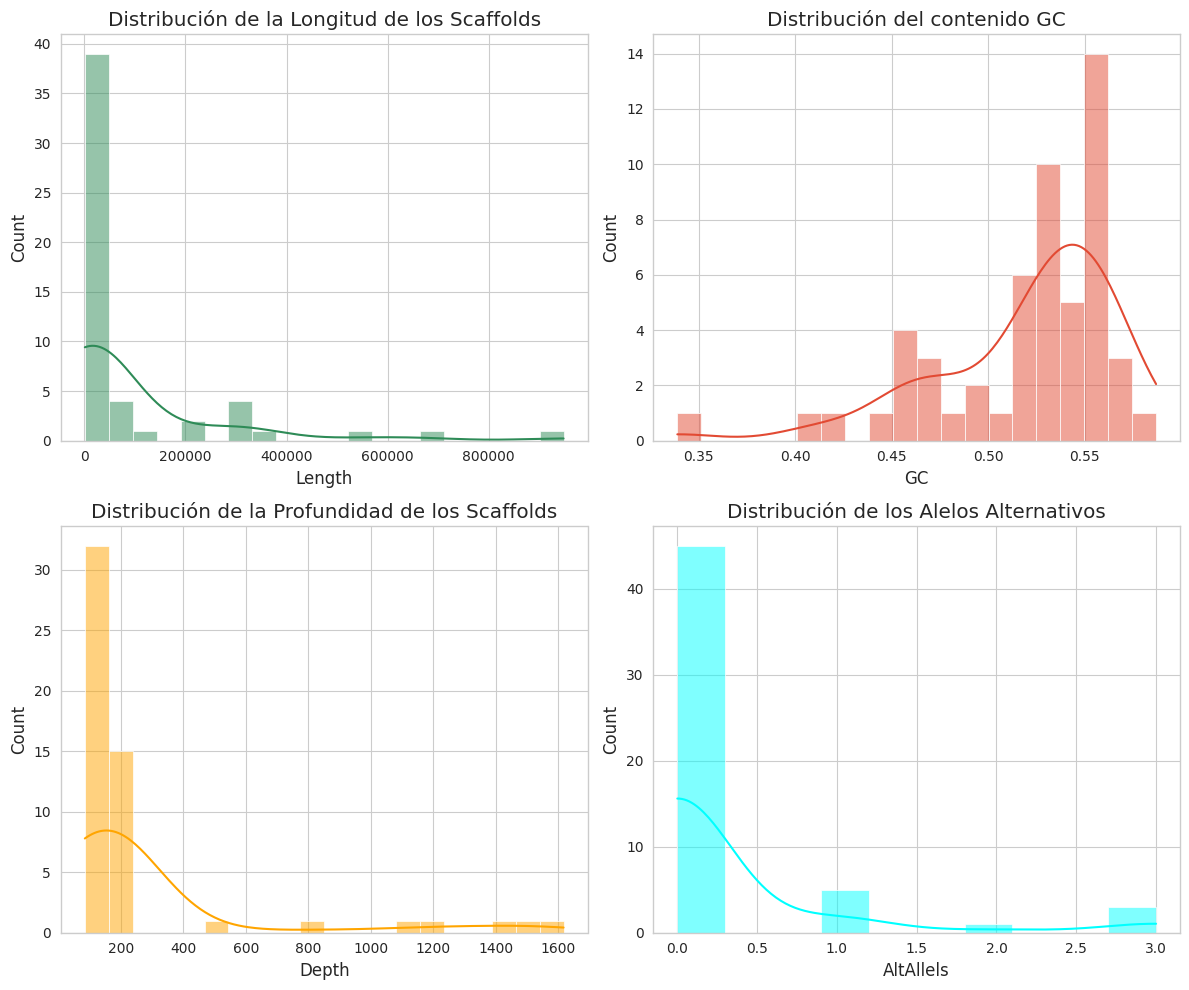

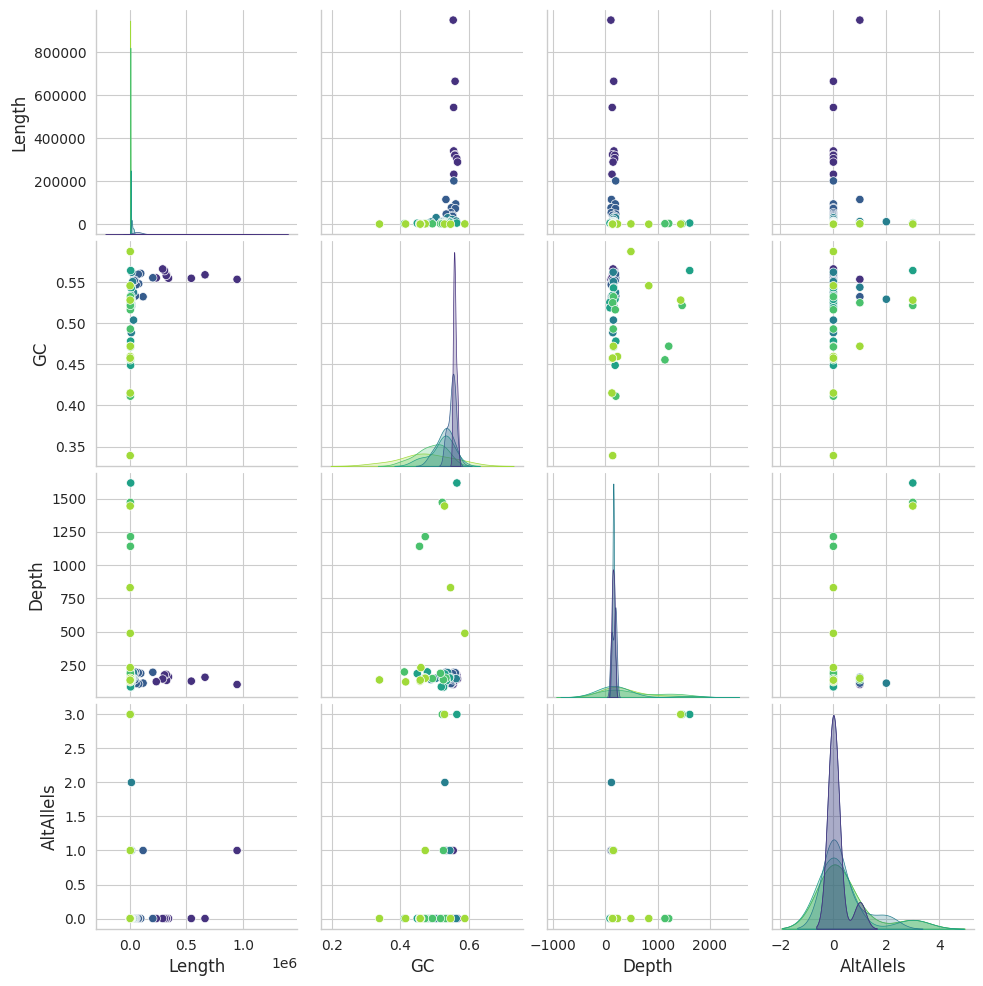

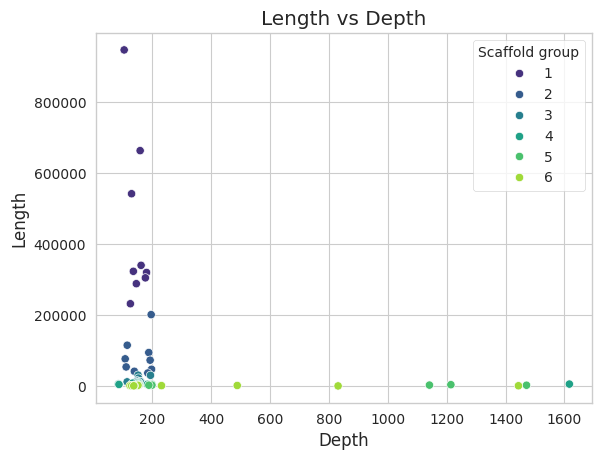

Total de Alelos Alternativos: 16

Procesando archivo LengthDepth_23.csv


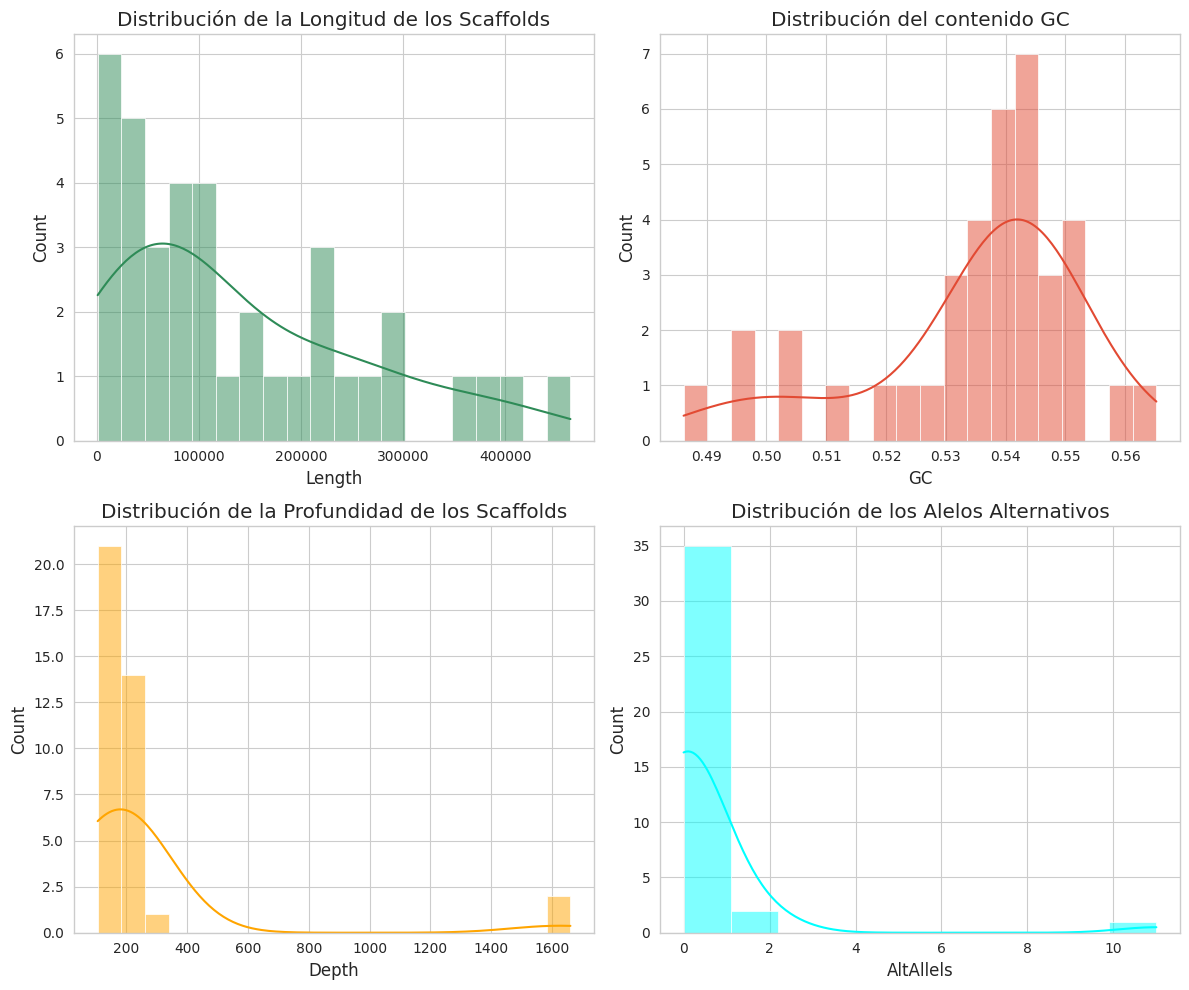

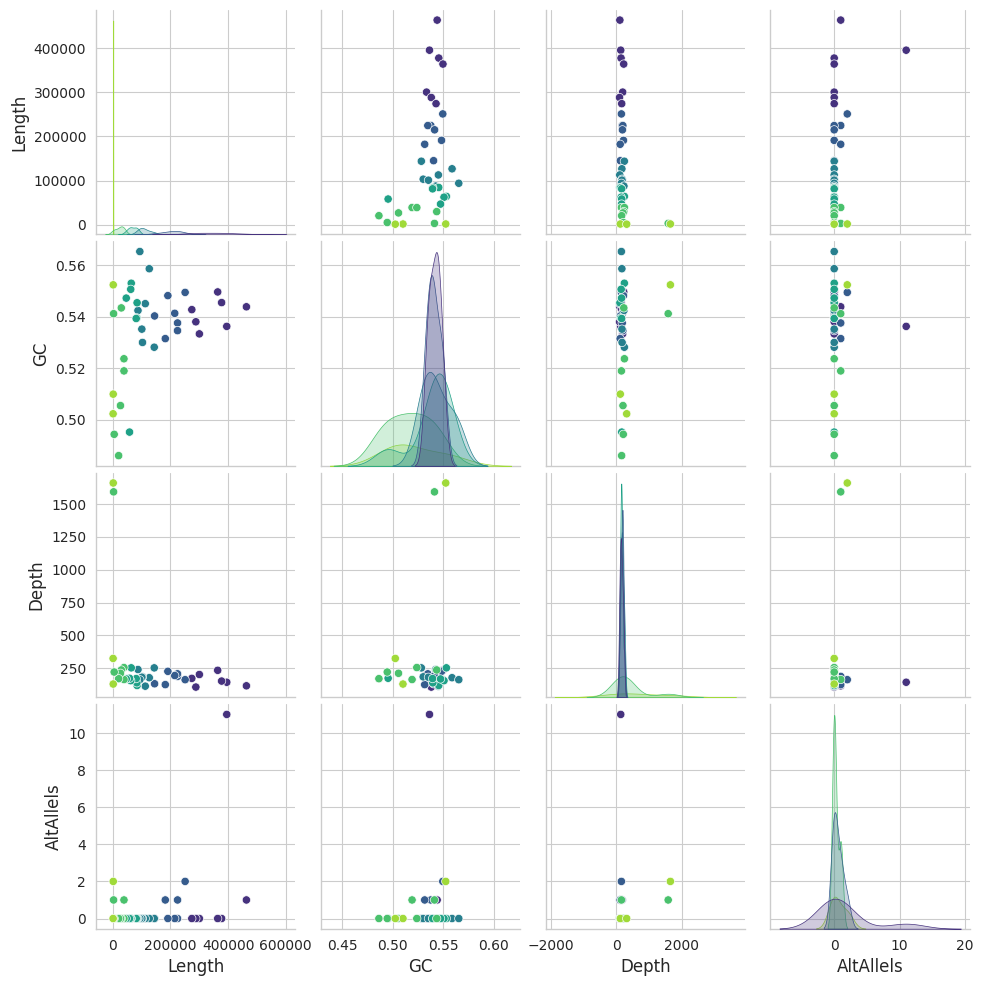

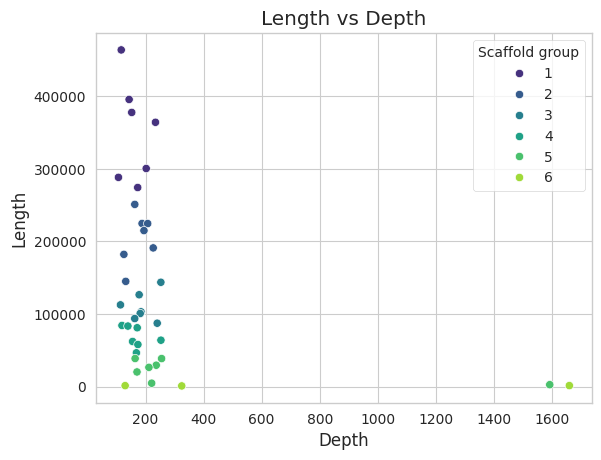

Total de Alelos Alternativos: 20

Procesando archivo LengthDepth_24.csv


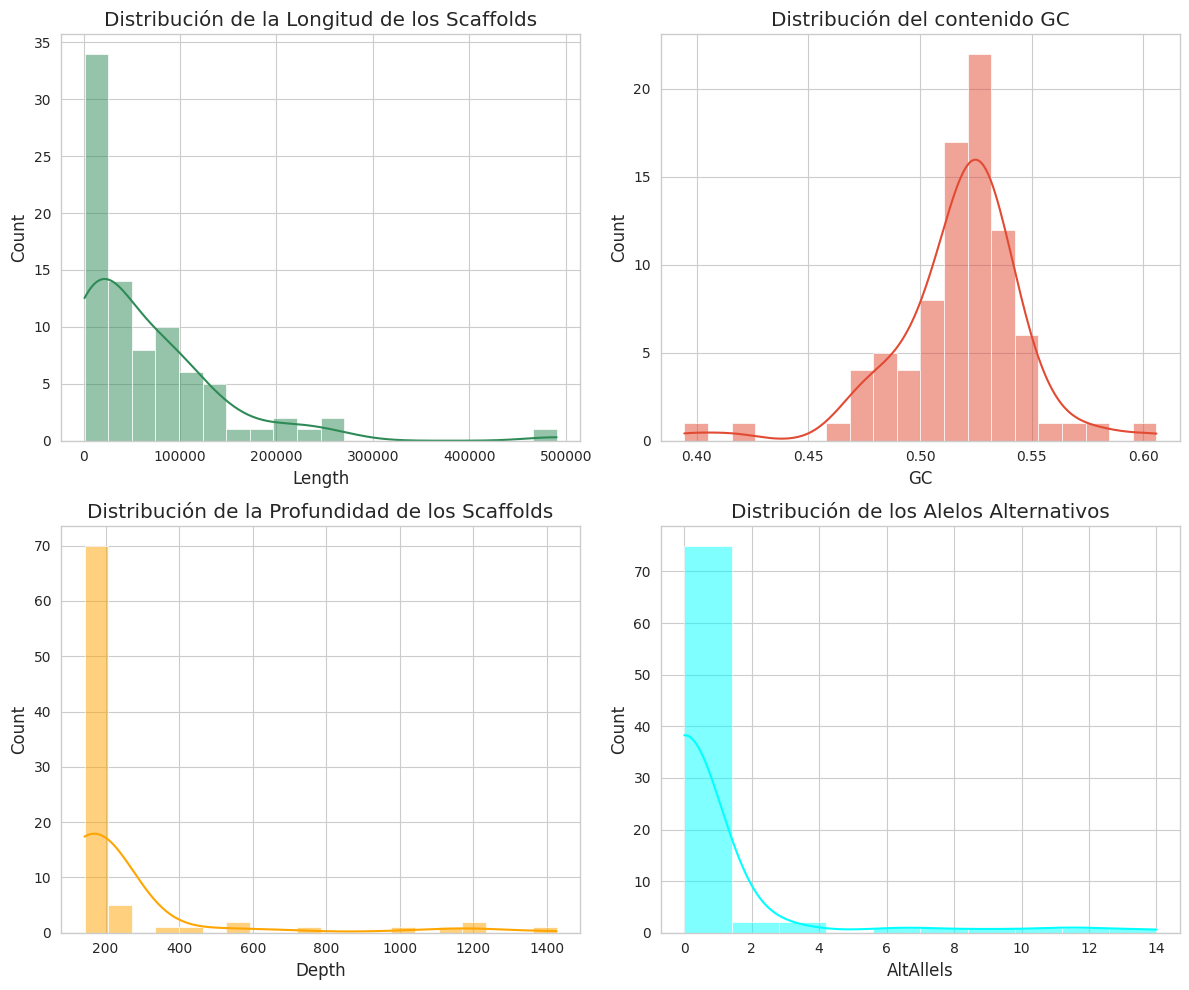

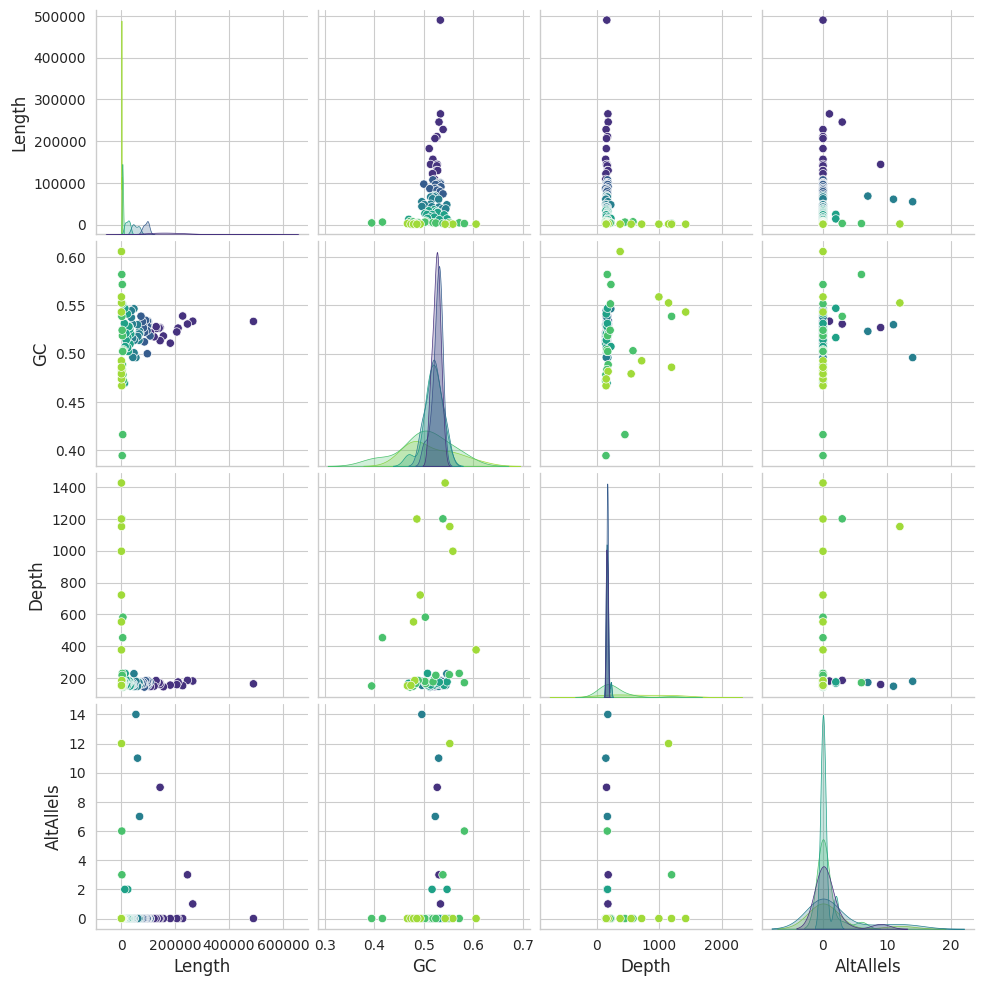

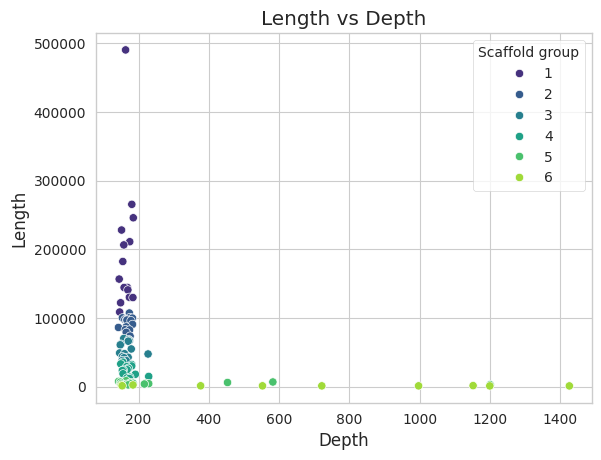

Total de Alelos Alternativos: 70

Procesando archivo LengthDepth_25.csv


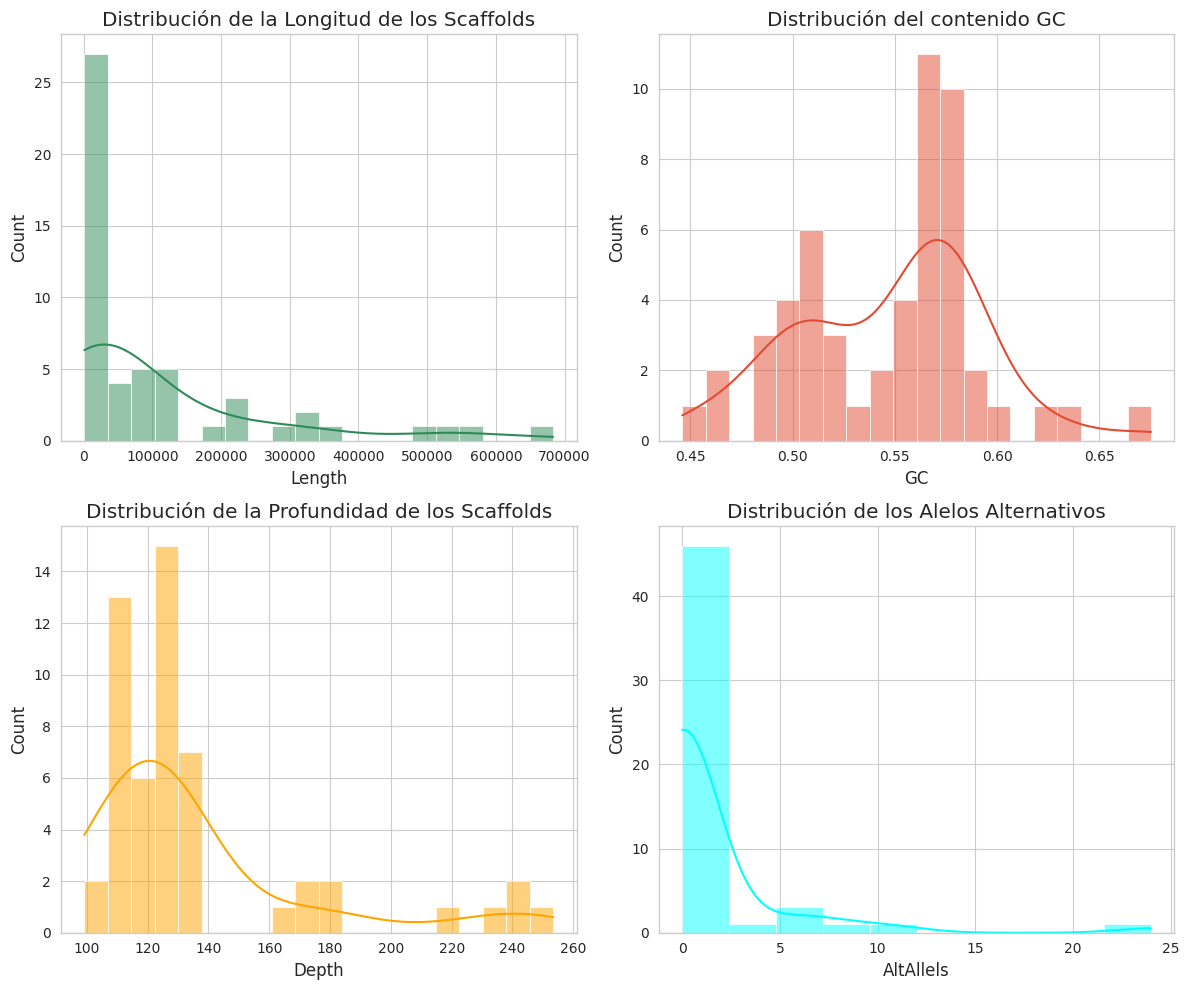

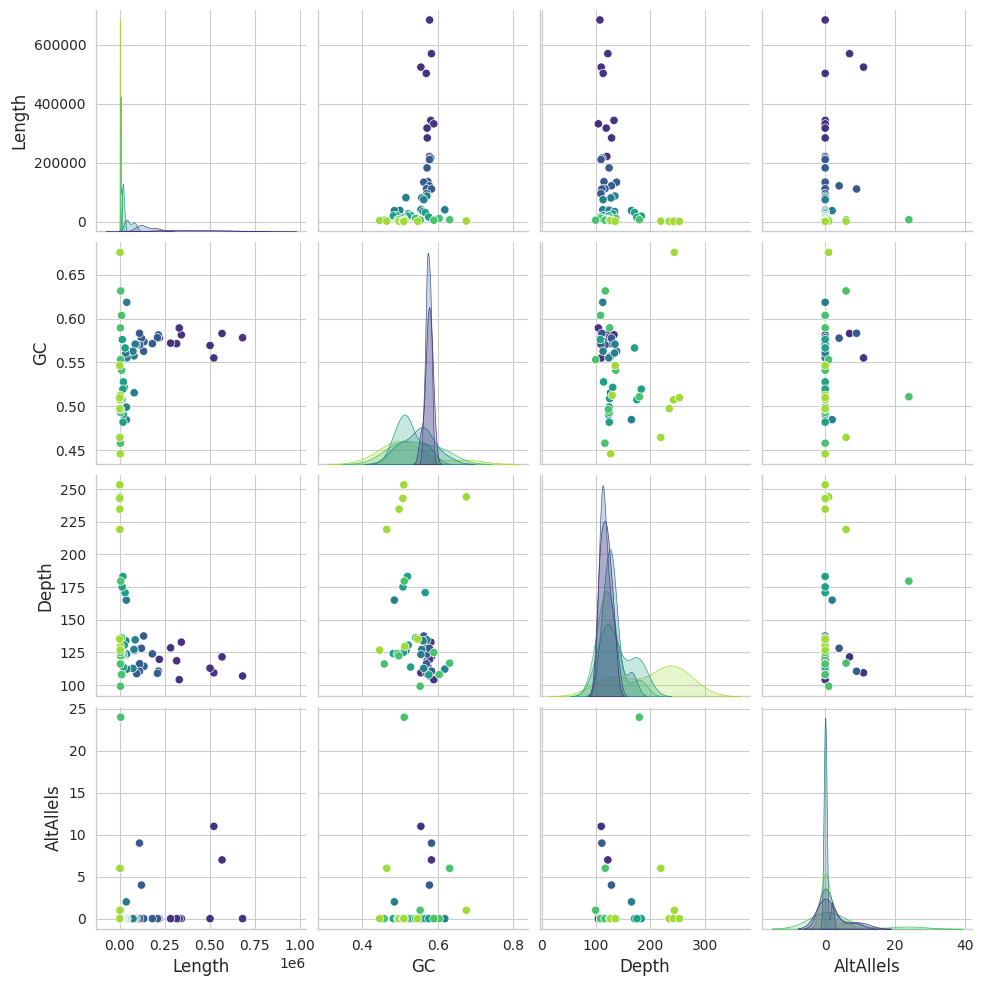

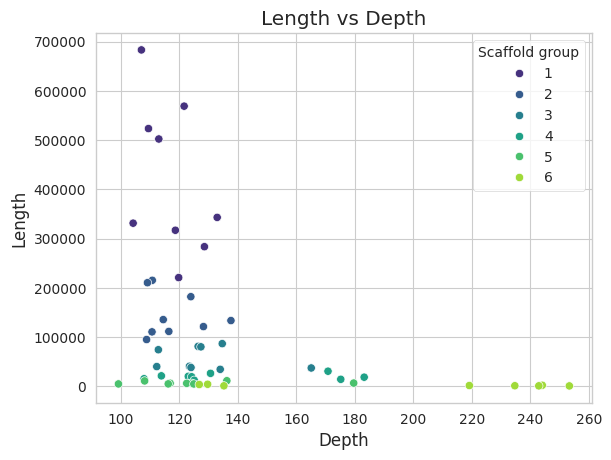

Total de Alelos Alternativos: 71

Procesando archivo LengthDepth_26.csv


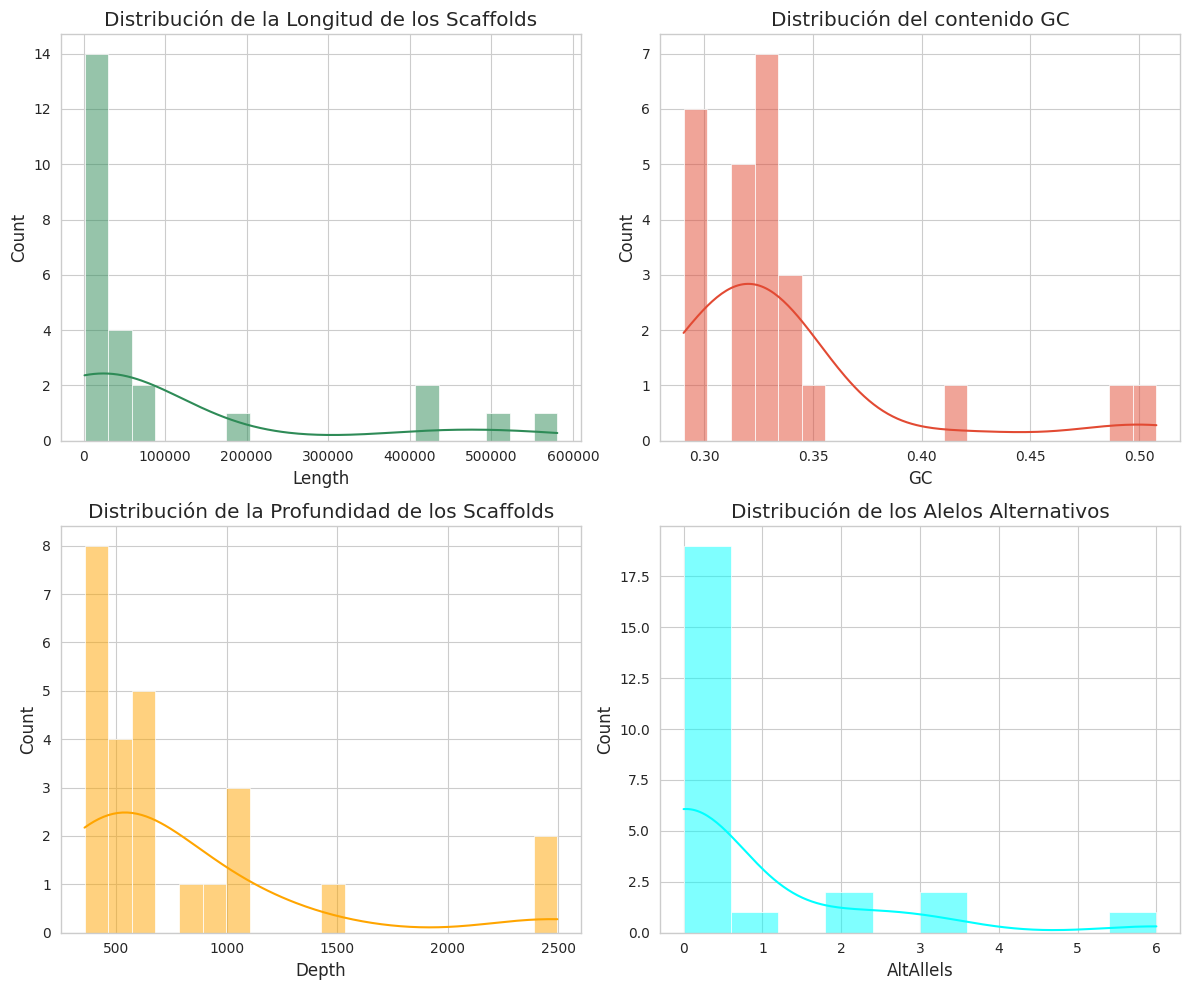

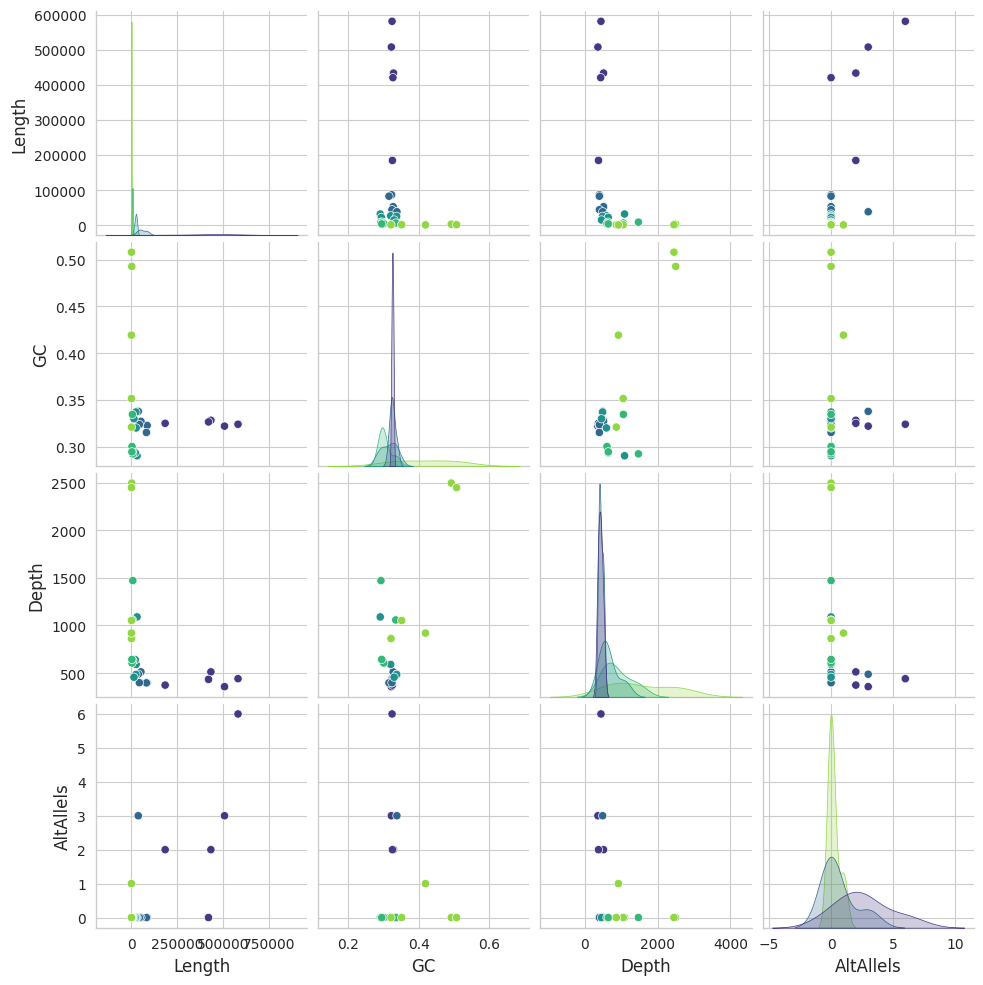

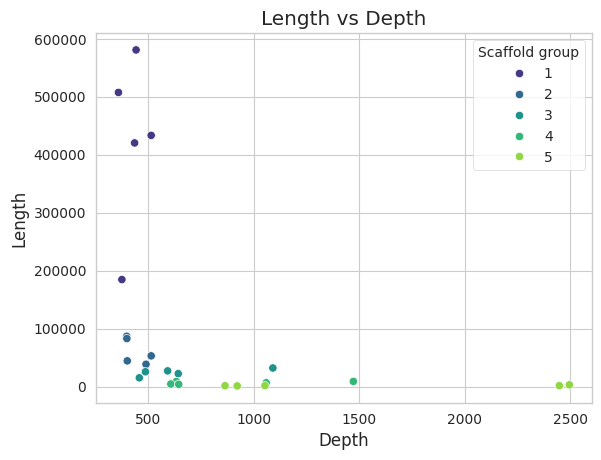

Total de Alelos Alternativos: 17

Procesando archivo LengthDepth_27.csv


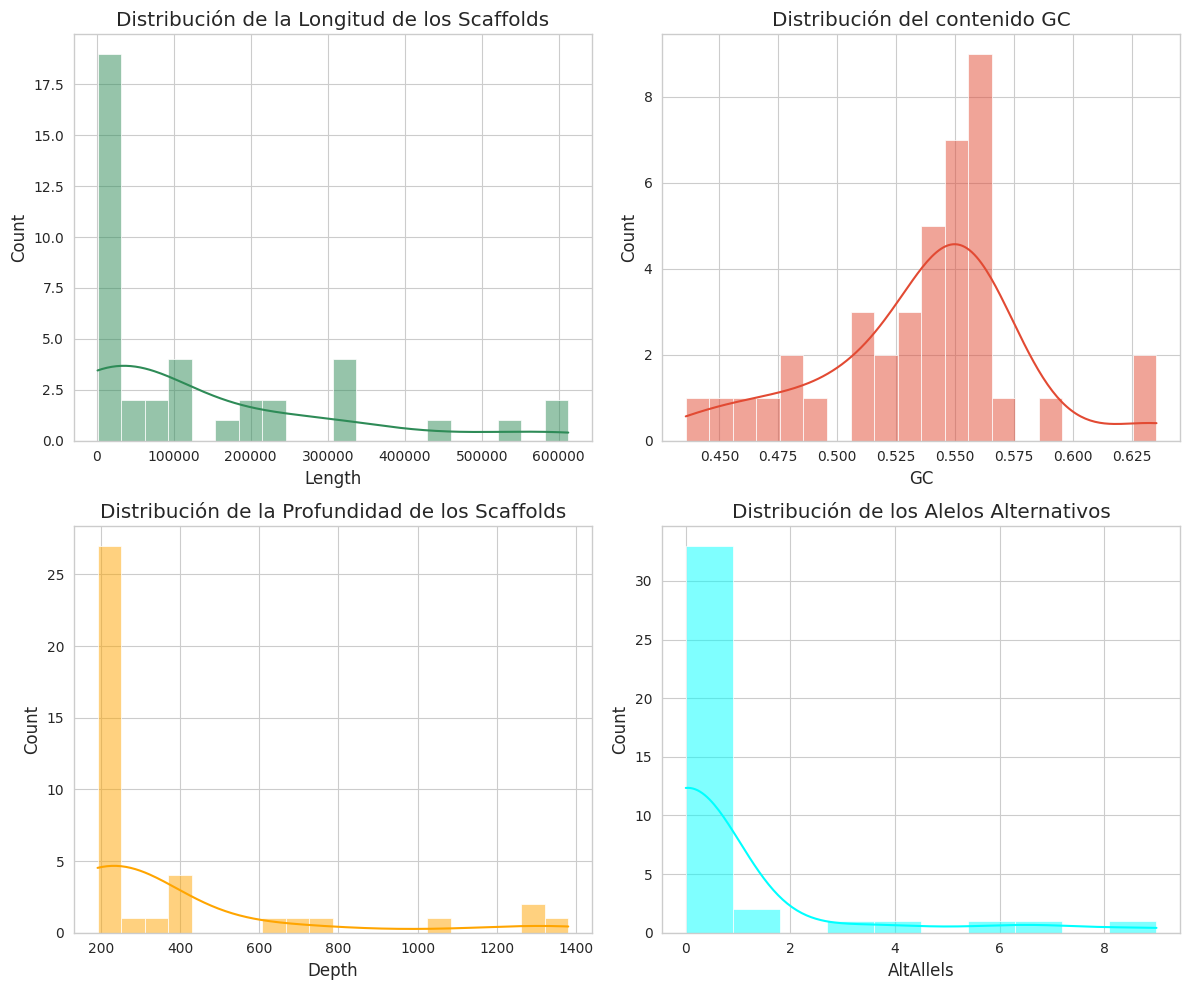

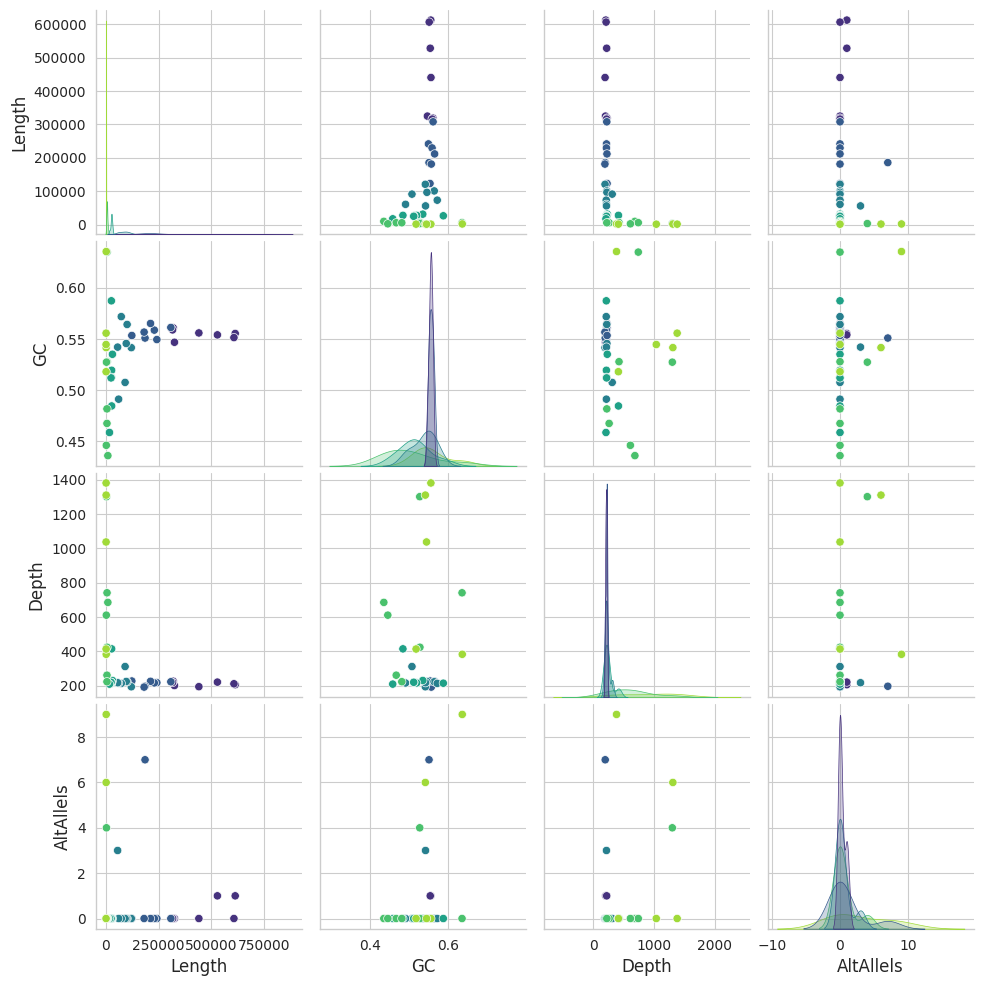

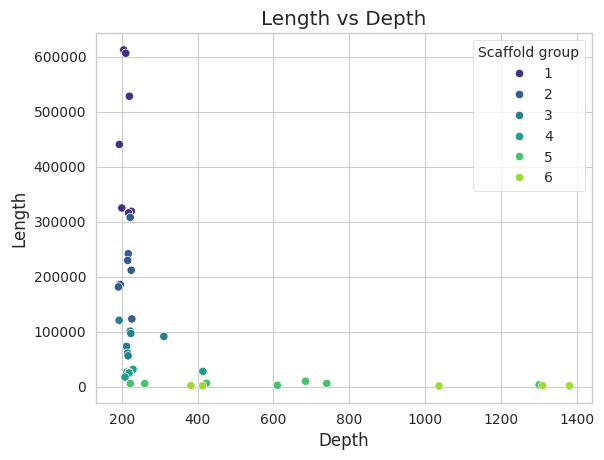

Total de Alelos Alternativos: 31

Procesando archivo LengthDepth_28.csv


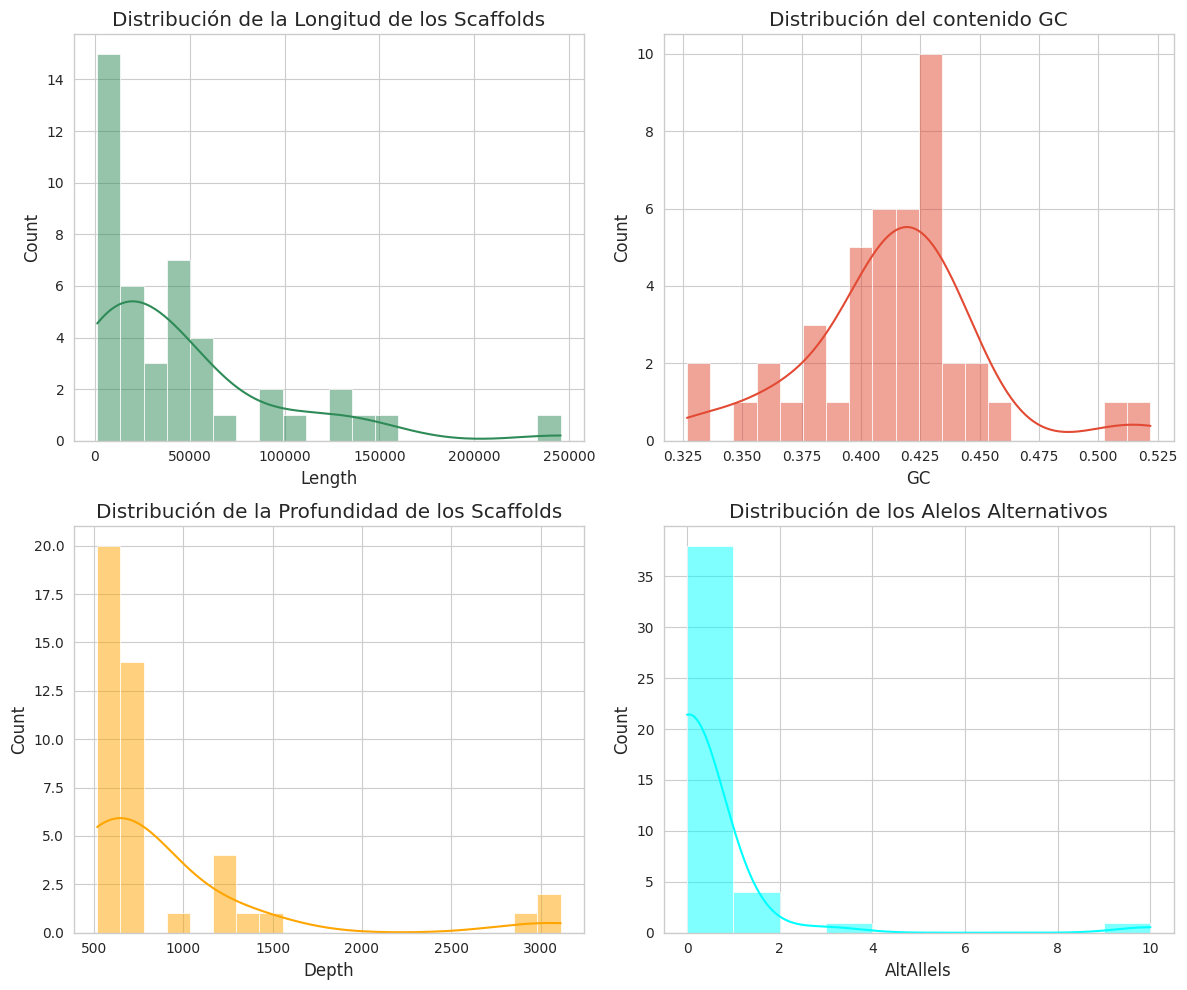

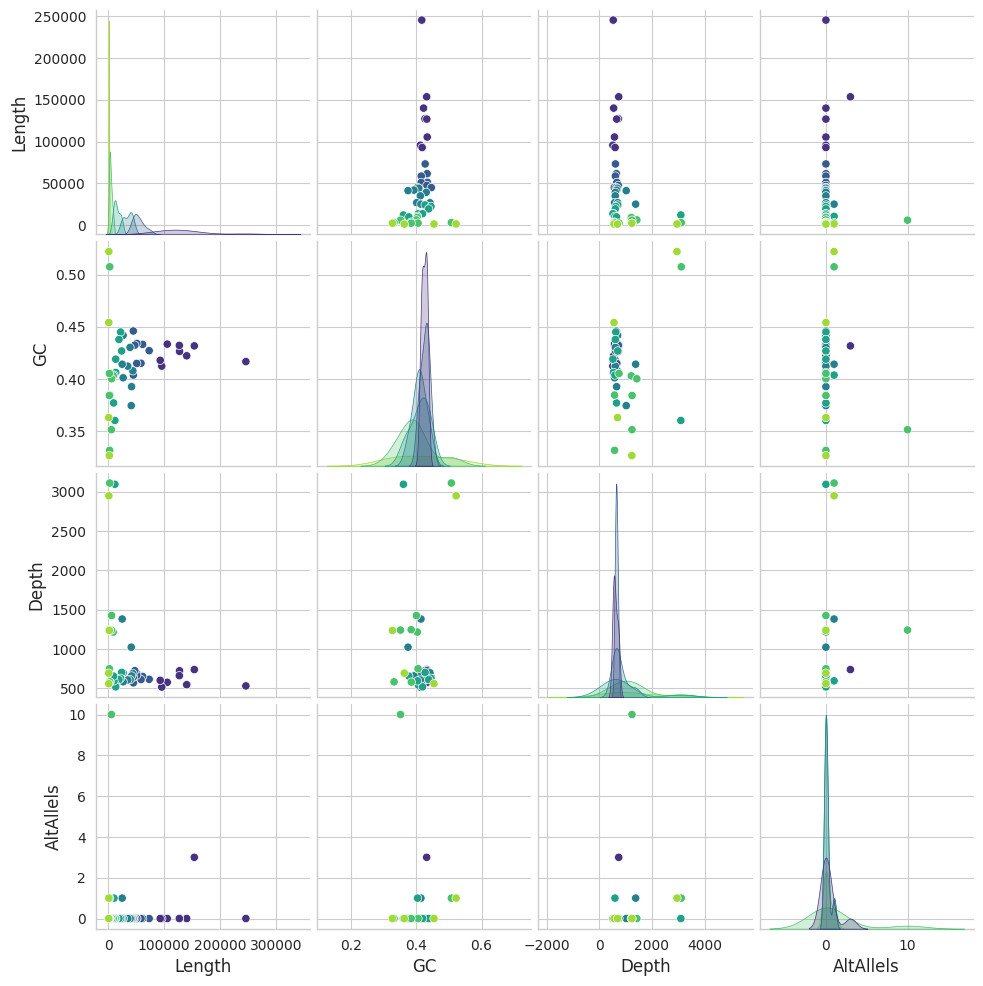

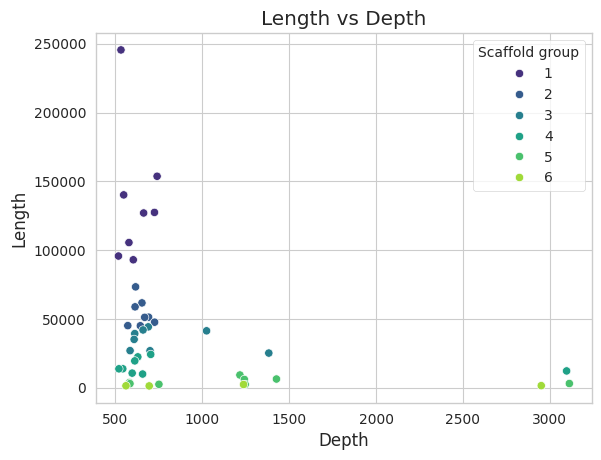

Total de Alelos Alternativos: 17



In [8]:
    for i in range(22, 29):
      print(f"Procesando archivo LengthDepth_{i}.csv")
      process_genomic_data(f"/content/drive/MyDrive/Python/Procesamiento-Genomica-22-28/LengthDepth_{i}.csv")
      print()